## Tipos de imagenes
- Imagen a color: Matriz de n x m, donde cada uno de los valores es una tupla de 3 valores con distintas representaciones (RGB,BGR,HSV o HSI,etc). Mide el color de la imagen.
- Imagen en escala de grises: Matriz de n x m, donde cada uno de los valores va entre 0 y 255 y este refleja la intensidad del color gris (0 es negro (nada de intensidad) y 255 es blanco(total intensidad)). Mide la intensidad de la imagen y es más fácil trabajar con solo un canal.
- Imagen binaria: Matriz de n x m, donde cada uno de los valores solo puede ser 0 o 255, (blanco o negro). Sirve para definir formas o objetos de interés. Se suele definir con un threshold (umbral)

In [6]:
import cv2 #Importando openCV
import matplotlib.pyplot as plt
import numpy as np

### Imagen en formato BGR Y RGB

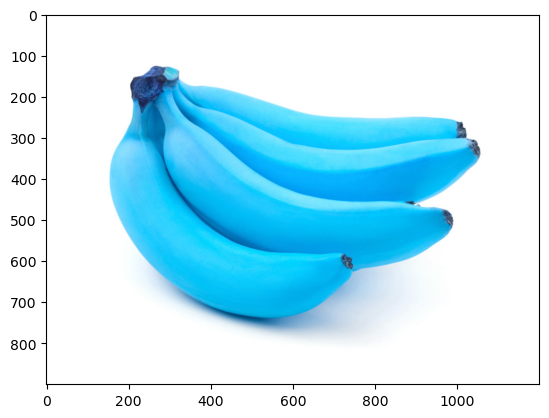

In [2]:
img_platano = cv2.imread("data/bananos.jpg") #Lectura en formato BGR
plt.imshow(img_platano) #Se ve extraña por el formato.

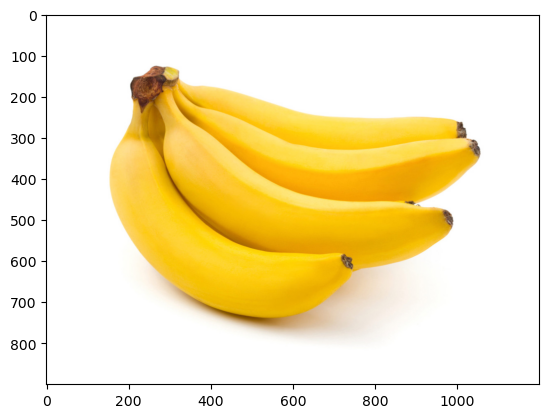

In [45]:
rgb_platano = cv2.cvtColor(img_platano,cv2.COLOR_BGR2RGB)
r = rgb_platano[:,:,0]
g = rgb_platano[:,:,1]
b = rgb_platano[:,:,2]
plt.imshow(rgb_platano)

### Imagen en escala de grises

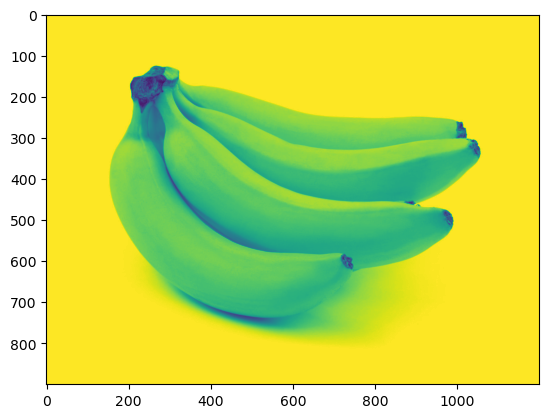

In [9]:
img_gray_platano = cv2.cvtColor(rgb_platano,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_platano)

### Imagen binaria

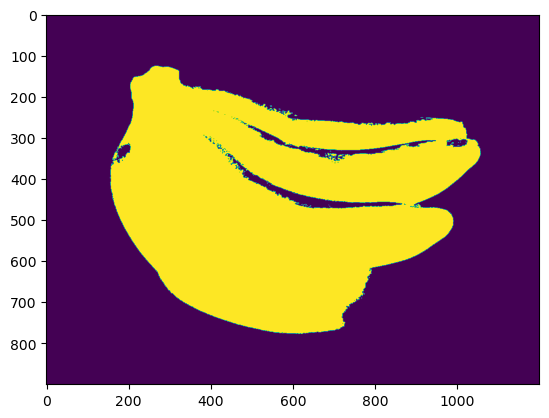

In [53]:
threshold = 220
mask = img_gray_platano < threshold
img_binaria = np.uint8(255*mask)
plt.imshow(img_binaria)

## Histograma de una imagen

La idea es buscar un valor que separe los 2 "grupos" que se forman en el histograma y usar este para el threshold.

(array([2.10000e+01, 3.21000e+02, 8.27000e+02, 1.22600e+03, 1.80700e+03,
        2.28100e+03, 2.62500e+03, 4.15700e+03, 5.40700e+03, 3.71200e+03,
        3.98800e+03, 1.42270e+04, 5.02380e+04, 5.95220e+04, 7.00810e+04,
        8.35000e+04, 6.38050e+04, 2.69750e+04, 1.50570e+04, 6.70223e+05]),
 array([ 28.  ,  39.35,  50.7 ,  62.05,  73.4 ,  84.75,  96.1 , 107.45,
        118.8 , 130.15, 141.5 , 152.85, 164.2 , 175.55, 186.9 , 198.25,
        209.6 , 220.95, 232.3 , 243.65, 255.  ]),
 <BarContainer object of 20 artists>)

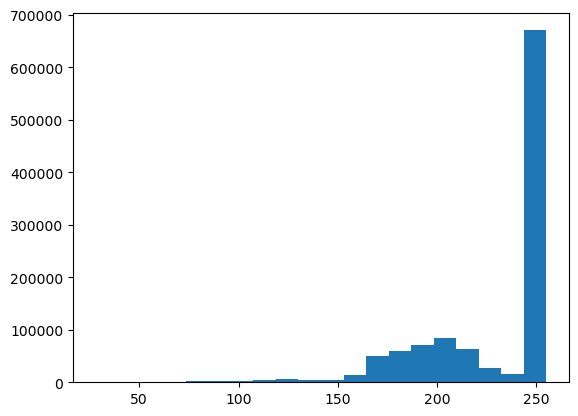

In [52]:
plt.hist(img_gray_platano.flatten(),bins=20)

## Operaciones entre imagenes

- Suma de imagenes a color: Se suma elemento a elemento (tupla de canales igual)
- Suma de imagenes en escala de grises: Elemento a elemento, si da mas de 255 se muestra como blanco. Igual queda el valor superior si se da el caso
- Multiplicacion de imagenes: util hacerlo con una imagen binaria, se debe preocurar que la imagen binaria esté entre 0 y 1 para que así funcione de filtro
- Resta de imagenes: Elemento a elemento, si da menos que 0 se muestra como negro pero igual queda el valor negativo
- Promedio entre imagenes: Suma de imagenes y luego división entre la cantidad de imagenes.

#### Operaciones en la imagen

- Sumar : np.sum(M)
- Min : np.min(M)
- Max : np.max(M)
- Media : np.mean(M)
- Varianza : np.var(M)
- Desviacion estandar : np.std(M)

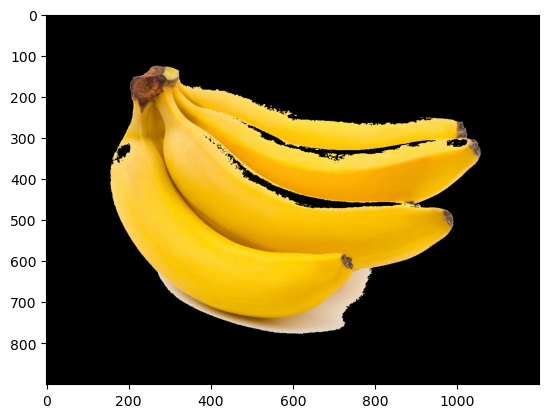

In [54]:
img_binaria_normalizada = img_binaria/255.
canales = [r,g,b]
copia_img_rgb = rgb_platano.copy()
for i,canal in enumerate(canales):
    copia_img_rgb[:,:,i] = copia_img_rgb[:,:,i]*img_binaria_normalizada
plt.imshow(copia_img_rgb)
